# import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

# Load Data

In [2]:
no2_file = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_no2_long.csv'

## default process (need to change data type)

In [3]:
air_quality = pd.read_csv(no2_file)

In [4]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [5]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


## change data type : pd.to_datetime()

In [6]:
#> to analyze time-series data, we must change str-type object to datetime type.
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'])

In [7]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


In [8]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [9]:
air_quality['date.utc'].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [10]:
air_quality['date.utc'].max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

## parse_dates & make datetime index at once

In [11]:
# pd.read_csv() -> df.to_datetime() -> df.set_index()
air_quality = pd.read_csv(no2_file, parse_dates = ['date.utc'], index_col='date.utc')

In [12]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2068 entries, 2019-06-21 00:00:00+00:00 to 2019-05-07 01:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   location   2068 non-null   object 
 3   parameter  2068 non-null   object 
 4   value      2068 non-null   float64
 5   unit       2068 non-null   object 
dtypes: float64(1), object(5)
memory usage: 177.6+ KB


In [13]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


## parsing as column VS as index

In [14]:
# air_quality DF : date.utc -> column(datetime type)
air_quality = pd.read_csv(no2_file, parse_dates = ['date.utc'])

# air_quality2 DF : date.utc -> index(DatetimeIndex type)
air_quality2 = pd.read_csv(no2_file, parse_dates = ['date.utc'], index_col = 'date.utc')

In [15]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [16]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


In [17]:
air_quality2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


In [18]:
air_quality2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2068 entries, 2019-06-21 00:00:00+00:00 to 2019-05-07 01:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   location   2068 non-null   object 
 3   parameter  2068 non-null   object 
 4   value      2068 non-null   float64
 5   unit       2068 non-null   object 
dtypes: float64(1), object(5)
memory usage: 177.6+ KB


# Structure of air_quality DF

In [19]:
air_quality['city'].value_counts()

Paris        1004
London        969
Antwerpen      95
Name: city, dtype: int64

In [20]:
air_quality['country'].value_counts()

FR    1004
GB     969
BE      95
Name: country, dtype: int64

In [21]:
air_quality['location'].value_counts()

FR04014               1004
London Westminster     969
BETR801                 95
Name: location, dtype: int64

In [22]:
air_quality['parameter'].value_counts()

no2    2068
Name: parameter, dtype: int64

In [23]:
air_quality['unit'].value_counts()

µg/m³    2068
Name: unit, dtype: int64

In [24]:
air_quality['value'].describe()

count    2068.000000
mean       26.261847
std        13.479451
min         0.000000
25%        17.000000
50%        25.000000
75%        33.000000
max        97.000000
Name: value, dtype: float64

In [25]:
air_quality['date.utc'].dt.year.unique()

array([2019], dtype=int64)

In [27]:
air_quality['date.utc'].dt.month.unique()

array([6, 5], dtype=int64)

In [28]:
air_quality['date.utc'].dt.day.unique()

array([21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,
        4,  3,  2,  1, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22],
      dtype=int64)

In [29]:
air_quality['date.utc'].dt.hour.unique()

array([ 0, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 10,  9,  8,  7,  6,
        5,  4,  3,  2,  1, 12, 11], dtype=int64)

In [30]:
#> 0(monday) ~ 6(sunday)
air_quality['date.utc'].dt.weekday.unique()

array([4, 3, 2, 1, 0, 6, 5], dtype=int64)

# Visualization

## mean NO2 by time and city

In [31]:
air_quality.groupby(by = [air_quality['date.utc'].dt.hour, 'city'])['value'].mean()

date.utc  city     
0         Antwerpen    24.750000
          London       24.292683
          Paris        31.683333
1         Antwerpen    25.838235
          London       24.757576
                         ...    
22        London       28.969697
          Paris        35.400000
23        Antwerpen    23.000000
          London       28.414634
          Paris        34.288095
Name: value, Length: 72, dtype: float64

In [33]:
no2_by_hour = air_quality.pivot_table(values = 'value',
                                      index = air_quality['date.utc'].dt.hour,
                                      columns = 'city')

In [34]:
no2_by_hour

city,Antwerpen,London,Paris
date.utc,,,
0,24.750000,24.292683,31.683333
1,25.838235,24.757576,27.433333
2,21.000000,21.800000,25.964286
3,21.333333,21.536585,25.234211
4,24.833333,18.976190,27.257895
5,29.500000,19.048780,35.534211
6,33.333333,20.976190,40.102381
7,37.666667,21.452381,40.569767
8,34.833333,21.238095,36.458140


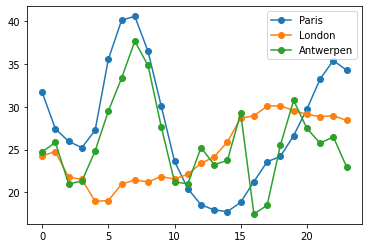

In [36]:
cities = ['Paris','London','Antwerpen']
for c in cities:
    plt.plot(no2_by_hour[c], 'o-', label = c)
plt.legend()
plt.show()

## mean NO2 by day and city

In [37]:
air_quality.groupby(by = [air_quality['date.utc'].dt.weekday, 'city'])['value'].mean().unstack()

city,Antwerpen,London,Paris
date.utc,,,
0,27.875000,23.969697,24.856250
1,22.214286,24.885714,30.999359
2,21.125000,23.460432,29.165753
3,27.500000,24.780142,28.600690
4,28.400000,26.446809,31.617986
5,33.500000,24.977612,25.266154
6,21.896552,24.859155,23.274306


In [38]:
no2_by_weekday=air_quality.pivot_table(values = 'value',
                                      index = air_quality['date.utc'].dt.weekday,
                                      columns = 'city')
no2_by_weekday

city,Antwerpen,London,Paris
date.utc,,,
0,27.875000,23.969697,24.856250
1,22.214286,24.885714,30.999359
2,21.125000,23.460432,29.165753
3,27.500000,24.780142,28.600690
4,28.400000,26.446809,31.617986
5,33.500000,24.977612,25.266154
6,21.896552,24.859155,23.274306


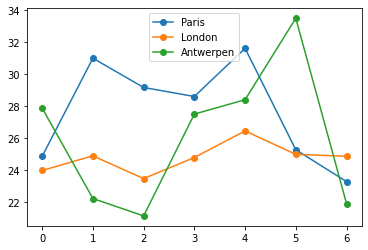

In [39]:
cities = ['Paris','London','Antwerpen']
for c in cities:
    plt.plot(no2_by_weekday[c], 'o-', label = c)

plt.legend()
plt.show()

# slicing using DatetimeIndex

In [40]:
air_quality2.index

DatetimeIndex(['2019-06-21 00:00:00+00:00', '2019-06-20 23:00:00+00:00',
               '2019-06-20 22:00:00+00:00', '2019-06-20 21:00:00+00:00',
               '2019-06-20 20:00:00+00:00', '2019-06-20 19:00:00+00:00',
               '2019-06-20 18:00:00+00:00', '2019-06-20 17:00:00+00:00',
               '2019-06-20 16:00:00+00:00', '2019-06-20 15:00:00+00:00',
               ...
               '2019-05-07 11:00:00+00:00', '2019-05-07 10:00:00+00:00',
               '2019-05-07 09:00:00+00:00', '2019-05-07 08:00:00+00:00',
               '2019-05-07 07:00:00+00:00', '2019-05-07 06:00:00+00:00',
               '2019-05-07 04:00:00+00:00', '2019-05-07 03:00:00+00:00',
               '2019-05-07 02:00:00+00:00', '2019-05-07 01:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date.utc', length=2068, freq=None)

In [41]:
air_quality2.index.max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

In [42]:
air_quality2.index.min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [43]:
# select one-day data
air_quality2.loc['2019-05-20':'2019-05-20']

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-05-20 23:00:00+00:00,Paris,FR,FR04014,no2,19.6,µg/m³
2019-05-20 22:00:00+00:00,Paris,FR,FR04014,no2,20.7,µg/m³
2019-05-20 21:00:00+00:00,Paris,FR,FR04014,no2,20.3,µg/m³
2019-05-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.6,µg/m³
2019-05-20 19:00:00+00:00,Paris,FR,FR04014,no2,21.3,µg/m³
...,...,...,...,...,...,...
2019-05-20 04:00:00+00:00,London,GB,London Westminster,no2,26.0,µg/m³
2019-05-20 03:00:00+00:00,London,GB,London Westminster,no2,32.0,µg/m³
2019-05-20 02:00:00+00:00,London,GB,London Westminster,no2,32.0,µg/m³


In [44]:
# select May data
air_quality2.loc['2019-05':'2019-05']

<ipython-input-44-438bc740631c>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  air_quality2.loc['2019-05':'2019-05']


,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-05-31 23:00:00+00:00,Paris,FR,FR04014,no2,81.7,µg/m³
2019-05-31 22:00:00+00:00,Paris,FR,FR04014,no2,68.0,µg/m³
2019-05-31 21:00:00+00:00,Paris,FR,FR04014,no2,60.2,µg/m³
2019-05-31 20:00:00+00:00,Paris,FR,FR04014,no2,37.0,µg/m³
2019-05-31 19:00:00+00:00,Paris,FR,FR04014,no2,23.3,µg/m³
...,...,...,...,...,...,...
2019-05-07 06:00:00+00:00,London,GB,London Westminster,no2,26.0,µg/m³
2019-05-07 04:00:00+00:00,London,GB,London Westminster,no2,16.0,µg/m³
2019-05-07 03:00:00+00:00,London,GB,London Westminster,no2,19.0,µg/m³


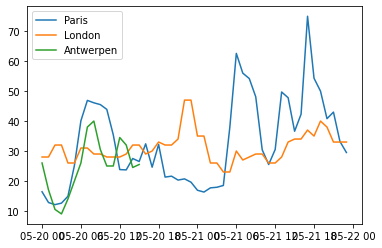

In [45]:
# visualize 2019.05.20 00:00:00 ~ 2019.05.21 23:00:00
subset = air_quality2.loc['2019-05-20':'2019-05-21']
pivoted = subset.pivot(columns = 'city', values = 'value')

cities = ['Paris','London','Antwerpen']
for c in cities:
    plt.plot(pivoted[c], label = c)
plt.legend()
plt.show()

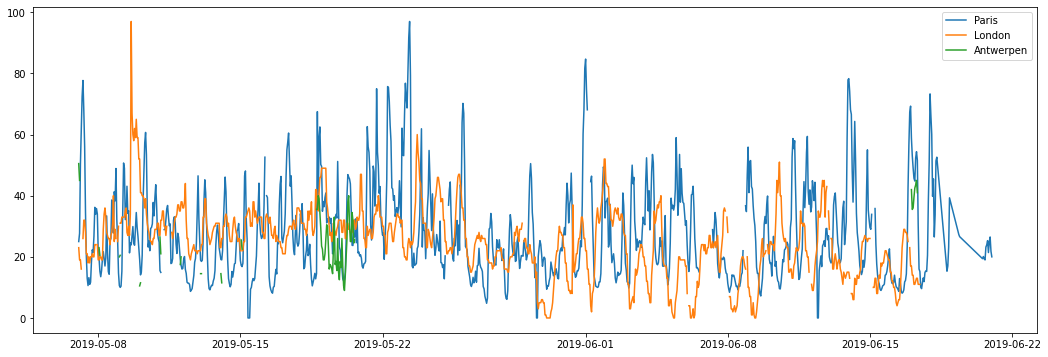

In [48]:
# visualize whole period,  by city
no2_by_city = air_quality2.pivot(columns = 'city', values = 'value')

plt.figure(figsize = (18, 6))
cities = ['Paris','London','Antwerpen']
for c in cities:
    plt.plot(no2_by_city[c], label = c)
plt.legend()
plt.show()